In [2]:
import pandas as pd

In [6]:
file_name = (r'C:\Users\MICACERE\Documents\Customer-Loyalty-Program\Data_explo\data.csv')
df = pd.read_csv(file_name, encoding='unicode_escape',  sep = ",")
pd.set_option('display.max_columns', None)


# Check if an order as been canceled
#df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
#df.loc[df['order_canceled'] == 1]
#df[df['InvoiceNo'].str.contains('C') == True]

#Drop all row with a quantity inferior to 0
df = df.drop(df[df['Quantity'] < 0].index)

# Number of orders per country (can be the same per shop):
df.groupby(['Country']).agg({'InvoiceNo' : 'nunique'}).sort_values(by = "InvoiceNo", ascending= False)

# Number of clients per country:
df.groupby(['Country']).agg({'CustomerID' : 'nunique'}).sort_values(by = "CustomerID", ascending= False)

# Top 5 of product the most buy
df.groupby(["Description"]).agg({'Quantity' : 'sum'}).sort_values(by = "Quantity", ascending= False).head(5)

# Transform InvoiceDate to a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format= '%m/%d/%Y %H:%M')

df["date"] = pd.to_datetime(df["InvoiceDate"].dt.date , format='%Y-%m-%d') # add column date
df["time"] = df["InvoiceDate"].dt.time  # add column hours

# Quantity ordered per month 
df2 = pd.DataFrame(df[['date', 'Quantity']])
df2.groupby(pd.Grouper(freq='MS', key='date')).sum()

,Quantity
date,
2010-12-01,362316
2011-01-01,397716
2011-02-01,286695
2011-03-01,384950
2011-04-01,312176
2011-05-01,399425
2011-06-01,394337
2011-07-01,407539
2011-08-01,425016


<AxesSubplot:xlabel='date'>

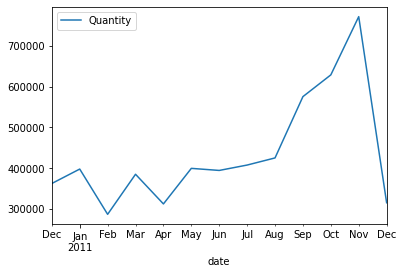

In [10]:
df2.groupby(pd.Grouper(freq='MS', key='date')).sum().plot()